## Deep Learning Practitioner Pod Capstone Project - Kimilee Gile
### Part 2: Classify the digits using a convolutional neural network (CNN) architecture
#### Team 3:  Kimilee and Renato      (KG - updated 4/6/2020 for latest part 2 instructions)


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, metrics, optimizers
from tensorflow.keras.utils import to_categorical
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Load data set and pre-process images and labels

In [0]:
# load and preprocess the training set data
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

first 5 training images


<function matplotlib.pyplot.show>

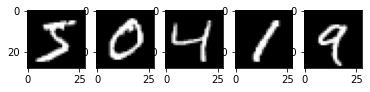

In [93]:
# preprocess image pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# visualize the first 5 training images
print("first 5 training images")
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(x_train[i], cmap="gray")
plt.show

In [94]:
# print the first 5 training labels
print("first 5 training labels")
labels = "labels: "
for i in range(5):
    labels = labels + " " + str(y_train[i])
print(labels)

first 5 training labels
labels:  5 0 4 1 9


In [95]:
# preprocess label values to one-hot encoding (needed for categorical cross entropy)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# verify one-hot encoding of the first train label
print("first training label with one-hot encoding")
print(y_train[0])

first training label with one-hot encoding
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [96]:
print("data and label shapes")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

data and label shapes
(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


# Task 6 - reduce training set to 10% of original size

In [97]:
ratio=10
x_train=x_train[:((x_train.shape[0] // ratio))]
y_train=y_train[:((y_train.shape[0] // ratio))]

print(f'New x_train.shape: {x_train.shape}')
print(f'New y_train.shape: {y_train.shape}')

New x_train.shape: (6000, 28, 28)
New y_train.shape: (6000, 10)


## Train & evaluate functions

In [0]:
def plotTrainAndValidationAccuracy(history, withValSplit=False):
    
    # plot accuracy
    plt.plot(history.history['categorical_accuracy'])
    if (withValSplit):
        plt.plot(history.history['val_categorical_accuracy'])
        plt.legend(['Train', 'Validation Split'], loc='upper left')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

    # plot loss
    plt.plot(history.history['loss'])
    if (withValSplit):
        plt.plot(history.history['val_loss'])
        plt.legend(['Train', 'Validation Split'], loc='upper left')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [0]:
# evaluate() - a function that...
#    prints a summary of the model, 
#    trains the model, 
#    graphs the training and validation accuracy, 
#    and prints a summary of its performance on the test data  
def evaluate(model, epochs=5, batch_size=128, withValSplit=False):
    
    print("** Model summary **")
    print(model.summary())
    
    print("\n\n** Training model (fit) **")
    if (withValSplit):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.15)
    else: 
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    plotTrainAndValidationAccuracy(history, withValSplit)

    print("\n\n** Evaluating model (in silent mode) **")
    results = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
    print("loss: " + str(results[0]))
    print("categorical accuracy: " + str(results[1]))
    
    return results,history

## Task 1: Implement a simple CNN with the following parameters fixed. 
- 1 convolutional layer will have 32 neurons (feature maps) and a 5x5 feature detector.
- from slack - padding 'same' and stride 1 

also
- Sigmoid transfer function for hidden layers
- Softmax activation function for the output layer
- Categorical cross entropy as loss function
- Stochastic Gradient Descent (SGD) as the optimization algorithm
- training epochs is 5 and a fixed batch size of 128

#### Hypothesis:   
The pre-work assignment of a single dense layer had an accuracy of .61.   With the same number of epochs and batch size, I believe a CNN will have better accuracy, perhaps .75.

In [0]:
model_t1 = models.Sequential()
model_t1.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t1.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t1.add(layers.Flatten())
model_t1.add(layers.Dense(10, activation='softmax'))
             
model_t1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
flatten_16 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                250890    
Total params: 251,722
Trainable params: 251,722
Non-trainable params: 0
_________________________________________________________________
None


** Training model (fit) **
Epoch 1/5
47/47 [==============================] - 3s 58ms/step - loss: 18.8310 - categorical_accuracy: 0.1020
Epoch 2/5
47/47 [==============================] - 3s 57ms/step - loss: 14.2912 

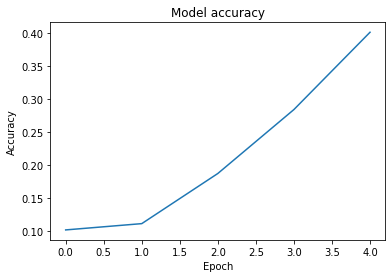

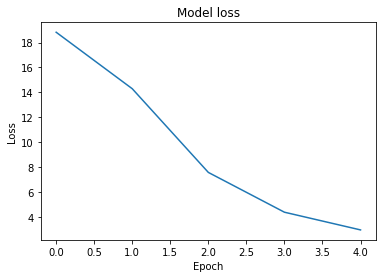



** Evaluating model (in silent mode) **
loss: 2.35241436958313
categorical accuracy: 0.47099998593330383


In [101]:
results_t1, history_t1 = evaluate(model_t1, epochs=5, batch_size=128, withValSplit=False)

#### Results:

My hypothesis was that a single convolutional layer CNN would get better accuracy than the single fully connected layer from the pre-work which achieved .61 where both models have similar hyperparameters.  The CNN definitely did achieve better accuracy!

Train accuracy: .8842    
Train loss: .3858

Evaluate accuracy: .8968  
Evaluate loss: .3557

This is not a surprise since CNNs are known to be good for image processing.   (Additional observation, flatten continues to be my nemesis!)

Sandeep : Accuracy is dropped to 0.62 from 0.89 and loss increased to 1.27 from 0.35

### Task 1 side quest:

I asked in the slack channel if one of the hints indicated that we were supposed to train (fit) with a validation split.  The initial answer was essentially 'what do you learn if you do'?  So, since I already have the code written to do it either way with just a bit of a tweak...

#### Hypothesis:
I think the resulting accuracy will be very close to the result without a split since I'm only splitting out 15% of the data.

In [0]:
model_t1_split15 = models.Sequential()
model_t1_split15.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t1_split15.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t1_split15.add(layers.Flatten())
model_t1_split15.add(layers.Dense(10, activation='softmax'))
             
model_t1_split15.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_17 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
flatten_17 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                250890    
Total params: 251,722
Trainable params: 251,722
Non-trainable params: 0
_________________________________________________________________
None


** Training model (fit) **
Epoch 1/5
40/40 [==============================] - 3s 65ms/step - loss: 18.0599 - categorical_accuracy: 0.1065 - val_loss: 17.1564 - val_categorical_accuracy: 0.1944
Epoch 2/5
40/40 [========

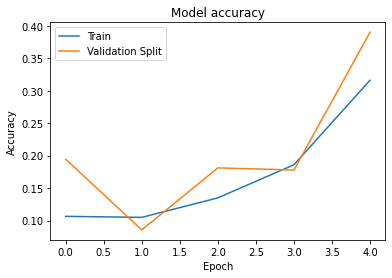

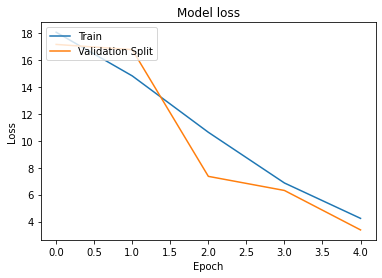



** Evaluating model (in silent mode) **
loss: 3.5099003314971924
categorical accuracy: 0.3736000061035156


In [103]:
results_t1_split15, history_t1_split15 = evaluate(model_t1_split15, epochs=5, batch_size=128, withValSplit=True)

#### Results:

Hypothesis was proven correct, accuracy is close but slightly lower due to 15% less training data.

Train accuracy 
- without validation split: .8842  
- with validation split: .8764
    

Evaluate accuracy
- without validation split: .8968  
- with validation split: .8564


## Task 2: Increase the complexity of the CNN by adding multiple convolution and dense layers. 
- Add one more convolutional layer with 32 neurons (feature maps) and a 5x5 feature detector. 
- Add a dense layer with 128 nodes.

everything else remains the same as the model from task 1


#### Hypothesis:   
Adding a second convolutional layer should improve accuracy because there are two layers of features to learn.  Perhaps it will reach .9 in 5 epochs?

In [0]:
model_t2 = models.Sequential()
model_t2.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t2.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t2.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t2.add(layers.Flatten())
model_t2.add(layers.Dense(128, activation='sigmoid'))
model_t2.add(layers.Dense(10, activation='softmax'))
             
model_t2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_18 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 3,239,146
Trainable params: 3,239,146
Non-trainable params: 0
_______________________

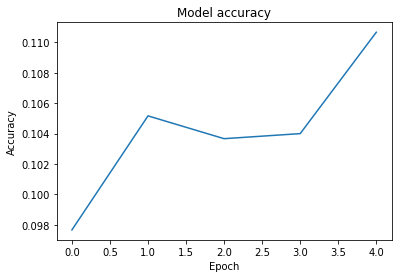

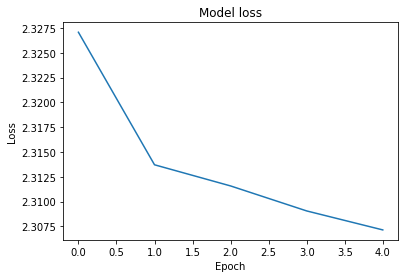



** Evaluating model (in silent mode) **
loss: 2.3046460151672363
categorical accuracy: 0.11349999904632568


In [105]:
results_t2, history_t2 = evaluate(model_t2, epochs=5, batch_size=128, withValSplit=False)

#### Results:

Woah, my hypothesis was way off.  I thought a second convolutional layer would improve accuracy, but it is much much lower.  It's so low it makes me think I have coded something wrong, but it's also likely that this is an intended learning experience.  It also took much longer to train each epoch.

Train accuracy
- single conv layer: .8842 
- two conv layers: .1722

Evaluate accuracy
- single conv layer: .8968
- two conv layers: .1985

I have two ideas on why the accuracy is so much lower.  Most likely, given the much higher number of trainable parameters in the more complex model, it will take significantly longer to converge.  Another potential reason is that the mnist images are simple enough that multiple layers of features are not actually productive.  

## Task 3: How can I improve the models? 

Will hyper-parameter optimization help in increasing the accuracy?

Elements which must remain fixed...

- Sigmoid transfer function for hidden layers
- Softmax activation function for the output layer
- Categorical cross entropy as loss function
- Stochastic Gradient Descent (SGD) as the optimization algorithm
- training epochs is 5 and a fixed batch size of 128


#### Hypothesis:   
I am going to do 3 experiments starting with the model from step 2 to see what improvements can be made to the very drastic slow learning:

a) increase learning rate and add momentum - I'm going to set these fairly high to show that high values increase accuracy quicker but may cause oscillation and potentially training may not converge 
- learning rate from 0.01 to 0.70,  momentum from 0.0 to 0.70

b) add learning rate decay to slow down the craziness in oscillation that I expect to see in the first experiment.  I did a bit of investigation into recommended decay and decided on decay=1e-2/epochs

c) based on the results from the above two experiments, reduce learning rate and momentum to something more reasonable, which provides better results than 

Then I will try two experiments with the best of the above and independently remove the two layers added in step 2 to see which has the most impact on convergance and time.

d) remove first the second Conv layer

e) then remove the 128 dense layer (with the second Conv layer back in

There's so much more to do with more time...   :-D

In [0]:
#  experiment 3a - high learning rate and momentum   

model_t5a = models.Sequential()
model_t5a.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5a.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5a.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5a.add(layers.Flatten())
model_t5a.add(layers.Dense(128, activation='sigmoid'))
model_t5a.add(layers.Dense(10, activation='softmax'))
             
sgd_opt = optimizers.SGD(lr=0.7, momentum=0.7)
model_t5a.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_19 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_19 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 3,239,146
Trainable params: 3,239,146
Non-trainable params: 0
_______________________

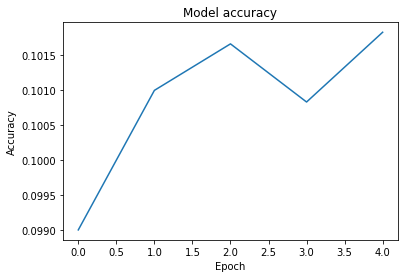

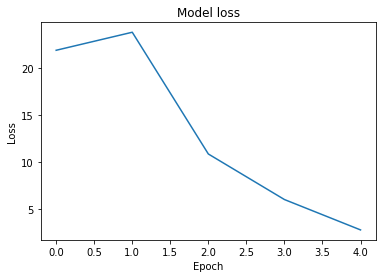



** Evaluating model (in silent mode) **
loss: 2.880166530609131
categorical accuracy: 0.0982000008225441


In [107]:
results_t5a, history_t5a = evaluate(model_t5a, epochs=5, batch_size=128, withValSplit=False)

In [0]:
#  experiment 3b - add decay

model_t5b = models.Sequential()
model_t5b.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5b.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5b.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5b.add(layers.Flatten())
model_t5b.add(layers.Dense(128, activation='sigmoid'))
model_t5b.add(layers.Dense(10, activation='softmax'))

#  with some research, decided on decay=1e-2/epochs
sgd_opt_b = optimizers.SGD(lr=0.7, momentum=0.7, decay=1e-2/5)
model_t5b.compile(optimizer=sgd_opt_b, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_20 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_20 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 3,239,146
Trainable params: 3,239,146
Non-trainable params: 0
_______________________

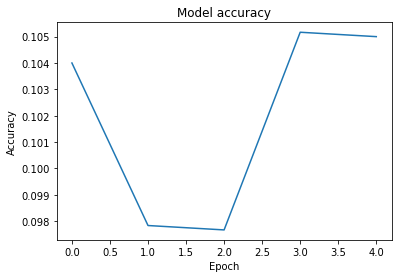

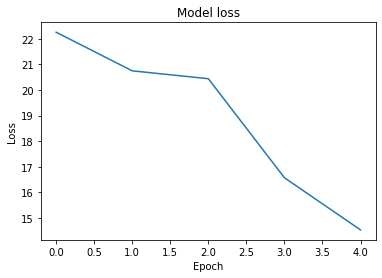



** Evaluating model (in silent mode) **
loss: 13.868300437927246
categorical accuracy: 0.0982000008225441


In [109]:
results_t5b, history_t5b = evaluate(model_t5b, epochs=5, batch_size=128, withValSplit=False)

In [0]:
#  experiment 3b 2 - add decay, try a higher decay

model_t5b2 = models.Sequential()
model_t5b2.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5b2.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5b2.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5b2.add(layers.Flatten())
model_t5b2.add(layers.Dense(128, activation='sigmoid'))
model_t5b2.add(layers.Dense(10, activation='softmax'))

#  try a higher decay,  1e-1/epochs
sgd_opt_b2 = optimizers.SGD(lr=0.7, momentum=0.7, decay=1e-1/5)
model_t5b2.compile(optimizer=sgd_opt_b2, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_21 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_21 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 3,239,146
Trainable params: 3,239,146
Non-trainable params: 0
_______________________

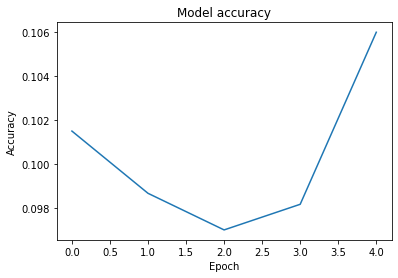

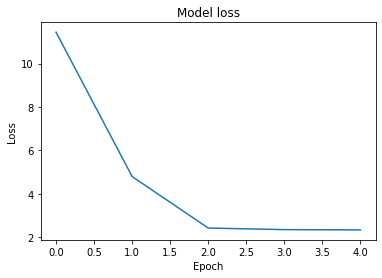



** Evaluating model (in silent mode) **
loss: 2.3404266834259033
categorical accuracy: 0.10100000351667404


In [111]:
results_t5b2, history_t5b2 = evaluate(model_t5b2, epochs=5, batch_size=128, withValSplit=False)

In [0]:
###  experiment 3c - more reasonable learning rate and momentum

model_t5c = models.Sequential()
model_t5c.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5c.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5c.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5c.add(layers.Flatten())
model_t5c.add(layers.Dense(128, activation='sigmoid'))
model_t5c.add(layers.Dense(10, activation='softmax'))

#  more reasonable learning rate, reduced momentum and go back to lower decay, 1e-2/epochs
sgd_opt_c = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t5c.compile(optimizer=sgd_opt_c, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_22 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_22 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 3,239,146
Trainable params: 3,239,146
Non-trainable params: 0
_______________________

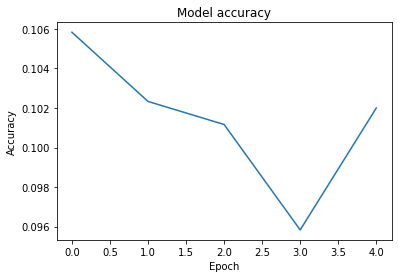

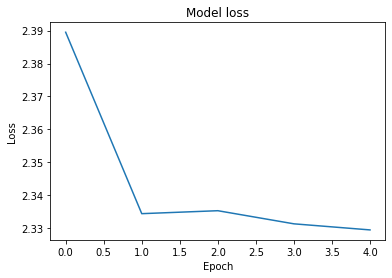



** Evaluating model (in silent mode) **
loss: 2.3437180519104004
categorical accuracy: 0.09799999743700027


In [113]:
results_t5c, history_t5c = evaluate(model_t5c, epochs=5, batch_size=128, withValSplit=False)

In [0]:
###  experiment 3d - remove second Conv2D layer (using 5c rate, momentum and decay)

model_t5d = models.Sequential()
model_t5d.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5d.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5d.add(layers.Flatten())
model_t5d.add(layers.Dense(128, activation='sigmoid'))
model_t5d.add(layers.Dense(10, activation='softmax'))

#  more reasonable learning rate, reduced momentum and go back to lower decay, 1e-2/epochs
sgd_opt_d = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t5d.compile(optimizer=sgd_opt_d, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_23 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
flatten_23 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 3,213,514
Trainable params: 3,213,514
Non-trainable params: 0
_________________________________________________________________
None


** Training model (fit) **
Epoch 1/5
47/47 [==============================] - 5s 1

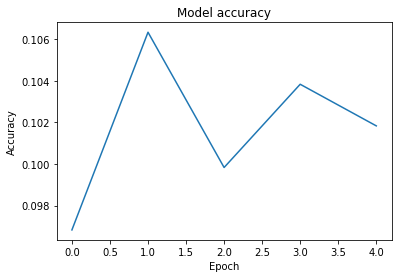

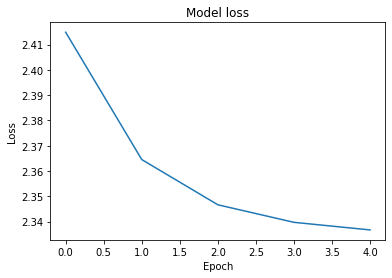



** Evaluating model (in silent mode) **
loss: 2.3207170963287354
categorical accuracy: 0.10090000182390213


In [115]:
results_t5d, history_t5d = evaluate(model_t5d, epochs=5, batch_size=128, withValSplit=False)

In [0]:
###  experiment 3e - remove 128 dense layer, put second Conv2D layer back in (using 5c rate, momentum and decay)

model_t5e = models.Sequential()
model_t5e.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t5e.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5e.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t5e.add(layers.Flatten())
model_t5e.add(layers.Dense(10, activation='softmax'))

#  more reasonable learning rate, reduced momentum and go back to lower decay, 1e-2/epochs
sgd_opt_e = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t5e.compile(optimizer=sgd_opt_e, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_24 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten_24 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                250890    
Total params: 277,354
Trainable params: 277,354
Non-trainable params: 0
_________________________________________________________________
None


** Training model (fit) **
Epoch 1/5
47/47 [==============================] - 25s 536m

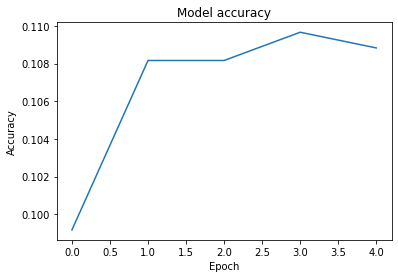

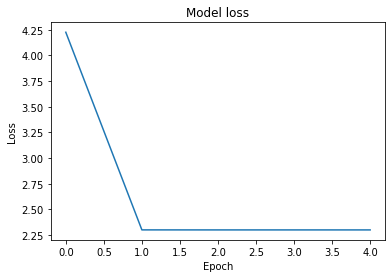



** Evaluating model (in silent mode) **
loss: 2.301774740219116
categorical accuracy: 0.11349999904632568


In [117]:
results_t5e, history_t5e = evaluate(model_t5e, epochs=5, batch_size=128, withValSplit=False)

## Results:

a) With high values for learning rate and momentum, training did not converge as expected.  Training time was worse for several of the epochs

Train accuracy
- from task 2: .1722
- with learning rate/momentum (0.7/0.7):
    - Epoch 1/5 - 165s 3ms/sample - loss: 6.7530 - categorical_accuracy: 0.0994
    - Epoch 2/5 - 182s 3ms/sample - loss: 2.4735 - categorical_accuracy: 0.0991
    - Epoch 3/5 - 198s 3ms/sample - loss: 2.4506 - categorical_accuracy: 0.1002
    - Epoch 4/5 - 174s 3ms/sample - loss: 2.4220 - categorical_accuracy: 0.1025
    - Epoch 5/5 - 161s 3ms/sample - loss: 2.4204 - categorical_accuracy: 0.0986



b) Adding decay of 1e-2/5 seemed to help a bit, but not significantly.  It trained a bit faster (seconds/epoch) and more consistently.  Accuracy is about the same.

Train accuracy
- from task 2: .1722
- with learning rate/momentum/decay (0.7/0.7/1e-2/5):
    - Epoch 1/5 - 162s 3ms/sample - loss: 18.8052 - categorical_accuracy: 0.1007
    - Epoch 2/5 - 160s 3ms/sample - loss: 4.4719 - categorical_accuracy: 0.0999
    - Epoch 3/5 - 160s 3ms/sample - loss: 2.4199 - categorical_accuracy: 0.0992
    - Epoch 4/5 - 161s 3ms/sample - loss: 2.3749 - categorical_accuracy: 0.1020
    - Epoch 5/5 - 162s 3ms/sample - loss: 2.3566 - categorical_accuracy: 0.1002

so I decided to increase the decay by a factor of 10 and try again, this seemed to helped a tiny bit but didn't make a difference.

Train accuracy
- from task 2: .1722
- with learning rate/momentum/decay (0.7/0.7/1e-1/5):
    - Epoch 1/5 - 164s 3ms/sample - loss: 4.8767 - categorical_accuracy: 0.1006
    - Epoch 2/5 - 163s 3ms/sample - loss: 2.3183 - categorical_accuracy: 0.1036
    - Epoch 3/5 - 162s 3ms/sample - loss: 2.3115 - categorical_accuracy: 0.1041
    - Epoch 4/5 - 164s 3ms/sample - loss: 2.3089 - categorical_accuracy: 0.1044
    - Epoch 5/5 - 164s 3ms/sample - loss: 2.3075 - categorical_accuracy: 0.1052


c) With a more reasonable learning rate (0.2), reduced momentum (0.5) and the lower decay (1e-2/5), training was about the same as before

Train accuracy
- from task 2: .1722
- with learning rate/momentum/decay (0.2/0.5/1e-2/5):
    - Epoch 1/5 - 165s 3ms/sample - loss: 2.3385 - categorical_accuracy: 0.1032
    - Epoch 2/5 - 160s 3ms/sample - loss: 2.3180 - categorical_accuracy: 0.1008
    - Epoch 3/5 - 160s 3ms/sample - loss: 2.3127 - categorical_accuracy: 0.1030
    - Epoch 4/5 - 160s 3ms/sample - loss: 2.3103 - categorical_accuracy: 0.1016
    - Epoch 5/5 - 159s 3ms/sample - loss: 2.3085 - categorical_accuracy: 0.1043


d) Removed second Conv2d layer, used rate, momentum and lower decay from c.  Without a doubt, the second Conv layer caused issues with both training time and convergance.  Training and test accuracy are both improved over the model from task 1.  With more time would do more experiments with the initial model architecture and changes to rate/momentum/decay.

Train accuracy
- from task 1: .8842
- from task 2: .1722
    - Epoch 1/5 - 40s 662us/sample - loss: 2.3400 - categorical_accuracy: 0.1036
    - Epoch 2/5 - 39s 653us/sample - loss: 2.2551 - categorical_accuracy: 0.1578
    - Epoch 3/5 - 39s 642us/sample - loss: 1.0919 - categorical_accuracy: 0.6870 
    - Epoch 4/5 - 38s 638us/sample - loss: 0.5141 - categorical_accuracy: 0.8632
    - Epoch 5/5 - 39s 647us/sample - loss: 0.3942 - categorical_accuracy: 0.8936

Evaluate accuracy
- from taks 1: .8968
- from task 2: .1985
- without second Conv2d layer learning rate/momentum/decay (0.2/0.5/1e-2/5): .9312

e) Removed 128 dense layer (kept second Conv2D layer), used rate, momentum and lower decay from c.  Minimally better in both time and accuracy from the model in c. Model is not converging though, it's very stuck.

Train accuracy
- from task 1: .8842
- from task 2: .1722
    - Epoch 1/5 - 151s 3ms/sample - loss: 2.5273 - categorical_accuracy: 0.1111
    - Epoch 2/5 - 149s 2ms/sample - loss: 2.3015 - categorical_accuracy: 0.1124
    - Epoch 3/5 - 145s 2ms/sample - loss: 2.3015 - categorical_accuracy: 0.1124
    - Epoch 4/5 - 146s 2ms/sample - loss: 2.3014 - categorical_accuracy: 0.1124
    - Epoch 5/5 - 143s 2ms/sample - loss: 2.3013 - categorical_accuracy: 0.1124

## Task 4:  Release the hounds!

I am free to change any parameter/architecture to improve the quality metrics.   I'm going to try to reduce the time to train and get accuracy up to at least .985.


#### Hypothesis:   
I am going to do several experiments starting with the model from 3d:

a) add max pooling and batch norm layers.  I expect time for each epoch to reduce noticably (I'm not measuring time, just noticing it) and I expect batch norm and pooling layers to impact accuracy.

b) starting with model from a), double the number of nodes/filters for the conv layer to 64, this may increase accuracy but I'm not confident that it will

c) starting with model from a), increase the batch size to 256, I believe this will reduce accuracy because the batch related tuning will happen less frequently

d) starting with model from a), reduce the batch size to 64, I believe this will increase accuracy but may take longer to train each epoch

e) starting with model from a), go to 3 conv layers and 2 pooling layers, I believe this will increase accuracy but may take longer to train each epoch



In [0]:
#  experiment 4a - add max pooling and batch norm layers 

model_t4a = models.Sequential()
model_t4a.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4a.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4a.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4a.add(layers.BatchNormalization())
model_t4a.add(layers.Flatten())
model_t4a.add(layers.Dense(128, activation='sigmoid'))
model_t4a.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4a = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4a.compile(optimizer=sgd_opt_4a, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_25 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
flatten_25 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_32 (Dense)             (Non

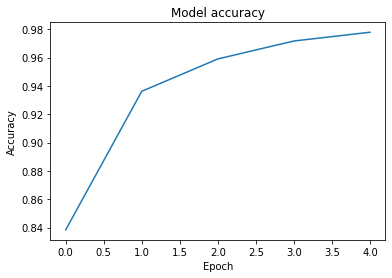

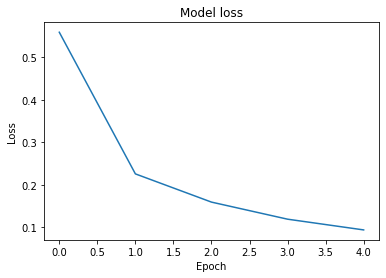



** Evaluating model (in silent mode) **
loss: 1.2003912925720215
categorical accuracy: 0.6592000126838684


In [119]:
results_t4a, history_t4a = evaluate(model_t4a, epochs=5, batch_size=128, withValSplit=False)

In [0]:
#  experiment 4b - double the number of nodes/filters for the conv layer to 64 

model_t4b = models.Sequential()
model_t4b.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4b.add(layers.Conv2D(64, 5, padding='same', activation='sigmoid'))
model_t4b.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4b.add(layers.BatchNormalization())
model_t4b.add(layers.Flatten())
model_t4b.add(layers.Dense(128, activation='sigmoid'))
model_t4b.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4b = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4b.compile(optimizer=sgd_opt_4b, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_26 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
flatten_26 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_34 (Dense)             (Non

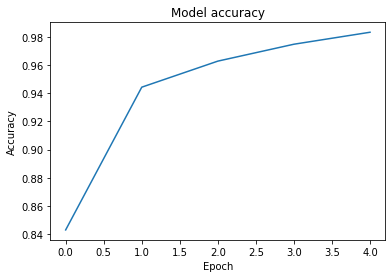

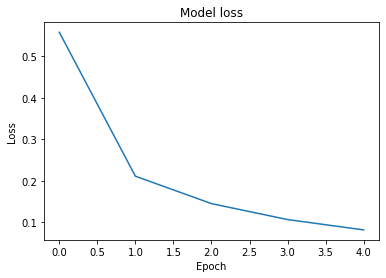



** Evaluating model (in silent mode) **
loss: 1.4997817277908325
categorical accuracy: 0.48330000042915344


In [121]:
results_t4b, history_t4b = evaluate(model_t4b, epochs=5, batch_size=128, withValSplit=False)

In [0]:
#  experiment 4c - increase the batch size to 256

model_t4c = models.Sequential()
model_t4c.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4c.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4c.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4c.add(layers.BatchNormalization())
model_t4c.add(layers.Flatten())
model_t4c.add(layers.Dense(128, activation='sigmoid'))
model_t4c.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4c = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4c.compile(optimizer=sgd_opt_4c, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_27 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten_27 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_36 (Dense)             (Non

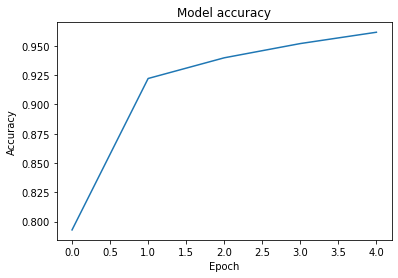

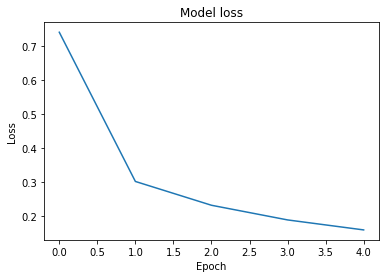



** Evaluating model (in silent mode) **
loss: 2.5861313343048096
categorical accuracy: 0.26980000734329224


In [123]:
results_t4c, history_t4c = evaluate(model_t4c, epochs=5, batch_size=256, withValSplit=False)

In [0]:
#  experiment 6d - reduce the batch size to 64 

model_t4d = models.Sequential()
model_t4d.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4d.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4d.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4d.add(layers.BatchNormalization())
model_t4d.add(layers.Flatten())
model_t4d.add(layers.Dense(128, activation='sigmoid'))
model_t4d.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4d = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4d.compile(optimizer=sgd_opt_4d, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten_28 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_38 (Dense)             (Non

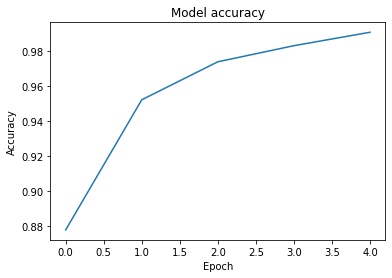

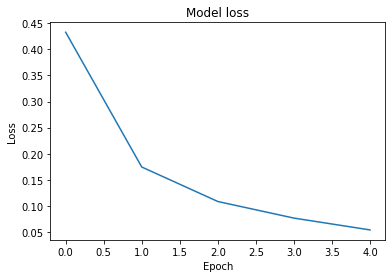



** Evaluating model (in silent mode) **
loss: 0.16959074139595032
categorical accuracy: 0.9556000232696533


In [125]:
results_t4d, history_t4d = evaluate(model_t4d, epochs=5, batch_size=64, withValSplit=False)

In [0]:
#  experiment 4e - go to 3 conv layers and 2 pooling

model_t4e = models.Sequential()
model_t4e.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4e.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4e.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4e.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4e.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4e.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4e.add(layers.BatchNormalization())
model_t4e.add(layers.Flatten())
model_t4e.add(layers.Dense(128, activation='sigmoid'))
model_t4e.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4e = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4e.compile(optimizer=sgd_opt_4e, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_29 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 32)          25632     
_________________________________________________________________
batch_normalization_4 (Batch (Non

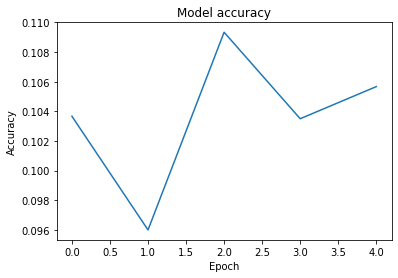

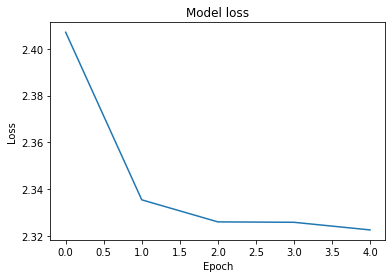



** Evaluating model (in silent mode) **
loss: 2.3254318237304688
categorical accuracy: 0.0957999974489212


In [127]:
results_t4e, history_t4e = evaluate(model_t4e, epochs=5, batch_size=128, withValSplit=False)

In [0]:
#  added experiment 4f - increase epochs

model_t4f = models.Sequential()
model_t4f.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_t4f.add(layers.Conv2D(32, 5, padding='same', activation='sigmoid'))
model_t4f.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_t4f.add(layers.BatchNormalization())
model_t4f.add(layers.Flatten())
model_t4f.add(layers.Dense(128, activation='sigmoid'))
model_t4f.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
sgd_opt_4f = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
model_t4f.compile(optimizer=sgd_opt_4f, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_30 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten_30 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_42 (Dense)             (Non

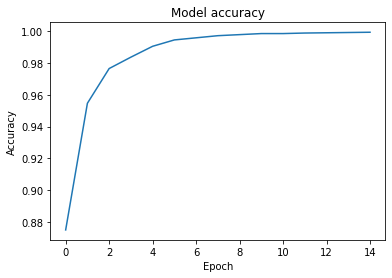

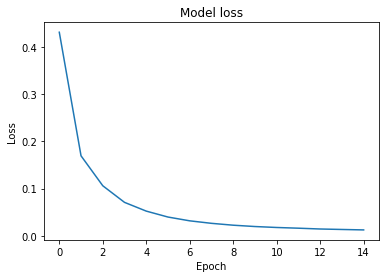



** Evaluating model (in silent mode) **
loss: 0.11309344321489334
categorical accuracy: 0.965399980545044


In [129]:
results_t4f, history_t4f = evaluate(model_t4f, epochs=15, batch_size=64, withValSplit=False)

#### Results:

a) Add max pooling and batch norm layers.  I expect time for each epoch to reduce noticably (I'm not measuring time, just noticing it) and I expect batch norm and pooling layers to impact accuracy.   

I was wrong about time, it actually took a little longer per epich.  The number of trainable parameters dropped from 3,213,514 to 805,130 but did not reduce the train time. Accuracy took a big jump though, not sure there's much more to do.  Continuing with the experiments though.

Train time
- from 3d: 39s last epoch
- with max pooling and batch norm: 47s last epoch

Train accuracy
- from 3d: .8842
- with max pooling and batch norm: .9921

Evaluate accuracy
- from 3d: .8968
- with max pooling and batch norm: .985



b) Double the number of nodes/filters for the conv layer to 64, this may increase accuracy but I'm not confident that it will.

It slowed down train time per epoch quite a bit, and minimally increased accuracy.  I believe this is because the images are simple enough that added feature recognizing filters only adds "confusion" rather than increasing the capabilities of the model.  The end result is slower but not significantly better.  Setting this back to 32 for the rest of the experiments.

Train time
- from 3d: 39s last epoch
- from 4a: 47s last epoch
- with conv filter at 64:  72s last epoch

Train accuracy
- from 4a: .9921
- with conv filter at 64: .9928

Evaluate accuracy
- from 4a: .985
- with conv filter at 64: .9865



c) Increase the batch size to 256, I believe this will reduce accuracy because the batch related tuning will happen less frequently.  

I was right.  There is a bit of a decrease in accuracy.  There was a more significant decrease in training time, though.  So this is where you balance accuracy vs. time.

Train time
- from 3d: 39s last epoch
- from 4a: 47s last epoch
- increase batch size to 256: 44s last epoch

Train accuracy
- from 4a: .9921
- increase batch size to 256: .9892

Evaluate accuracy
- from 4a: .985
- increase batch size to 256: .9857



d) Reduce the batch size to 64, I believe this will increase accuracy but may take longer to train each epoch

The training is a bit slower so I was right to expect that.  Accuracy was a bit better, the best so far.

Train time
- from 4a: 47s last epoch
- reduce batch size to 64: 57s last epoch

Train accuracy
- from 4a: .9921
- reduce batch size to 64: .9945

Evaluate accuracy
- from 4a: .985
- reduce batch size to: .9869



e) Changed to 3 conv layers and 2 pooling layers, I believe this will increase accuracy but may take longer to train each epoch.

I was very wrong.  It increased time per epoch but not nearly as much as I expected considering the initial experiments with 2 Conv layers.  Future experiments to try would be to see which more decreases the time, the two pooling layers or the batch norm layer.  I believe I would find that the batch norm layer has the greater impact on time.

I was also wrong on accuracy, it got worse.  I suspect this is because the images are simple enough that more convolutional layers only add confusion rather than improving accuracy.

Train time
- from 4a: 47s last epoch
- with 3 conv and 2 pooling:  73s last epoch

Train accuracy
- from 4a: .9921
- with 3 conv and 2 pooling: .9602

Evaluate accuracy
- from 4a: .985
- with 3 conv and 2 pooling: .9494



g) Added experiment with the best from the experiments above, d), but increase to 15 epochs to see if I could get better accuracy.

Train accuracy
- from 4d: .9945
- 4d + 15 epochs : .9977

Evaluate accuracy
- from 4d: .9869
- 4d + 15 epochs: .9872


With more time, I would try finessing some of the parameters more.  First I would try a combination of decreased batch size and increased epochs.  I would also play more with learning rate, momentum.  And I would try the experiment of seeing whether batch norm or pooling layers had the most impact on e).  


##  Post work...  add relu and Adam and see how that goes!

In the check-in it was suggested to try relu activation on the conv layer and Adam optimization.  Accuracy should get better with both changes as they are both better algorithms. 

previous best result in 5 epochs (4d)...

- Epoch 1/5 - 53s 875us/sample - loss: 0.1545 - categorical_accuracy: 0.9552
- Epoch 2/5 - 56s 926us/sample - loss: 0.0540 - categorical_accuracy: 0.9857
- Epoch 3/5 - 56s 939us/sample - loss: 0.0382 - categorical_accuracy: 0.9906
- Epoch 4/5 - 57s 953us/sample - loss: 0.0307 - categorical_accuracy: 0.9930
- Epoch 5/5 - 57s 954us/sample - loss: 0.0266 - categorical_accuracy: 0.9945

evaluation accuracy: .9869


Added relu to the conv layer...   train accuracy was a bit better, evaluation accuracy was the best so far

- Epoch 1/5 - 55s 909us/sample - loss: 0.1061 - categorical_accuracy: 0.9694
- Epoch 2/5 - 52s 870us/sample - loss: 0.0341 - categorical_accuracy: 0.9905
- Epoch 3/5 - 55s 918us/sample - loss: 0.0236 - categorical_accuracy: 0.9942
- Epoch 4/5 - 56s 933us/sample - loss: 0.0187 - categorical_accuracy: 0.9960
- Epoch 5/5 - 56s 941us/sample - loss: 0.0160 - categorical_accuracy: 0.9970

evaluation accuracy: .991

Added Adam with default params...    accuracy was similar, training time was consistent across all epochs

- Epoch 1/5 - 57s 951us/sample - loss: 0.1164 - categorical_accuracy: 0.9697
- Epoch 2/5 - 56s 935us/sample - loss: 0.0378 - categorical_accuracy: 0.9891
- Epoch 3/5 - 57s 949us/sample - loss: 0.0226 - categorical_accuracy: 0.9939
- Epoch 4/5 - 60s 992us/sample - loss: 0.0138 - categorical_accuracy: 0.9963
- Epoch 5/5 - 59s 990us/sample - loss: 0.0102 - categorical_accuracy: 0.9974

evaluate accuracy: .9883



In [0]:
#  Post experiment - add relu to conv layer...  then add Adam

model_tpb = models.Sequential()
model_tpb.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model_tpb.add(layers.Conv2D(32, 5, padding='same', activation='relu'))
model_tpb.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_tpb.add(layers.BatchNormalization())
model_tpb.add(layers.Flatten())
model_tpb.add(layers.Dense(128, activation='sigmoid'))
model_tpb.add(layers.Dense(10, activation='softmax'))

#  keep previous learning rate, reduced momentum and decay, 1e-2/epochs
#sgd_opt_tpa = optimizers.SGD(lr=0.2, momentum=0.5, decay=1e-2/5)
#model_tpa.compile(optimizer=sgd_opt_tpa, loss='categorical_crossentropy', metrics=['categorical_accuracy'])


# 2nd run - add Adam with default params
adam_opt = optimizers.Adam()
model_tpb.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

** Model summary **
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_31 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten_31 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_44 (Dense)             (Non

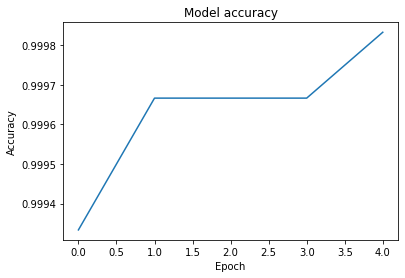

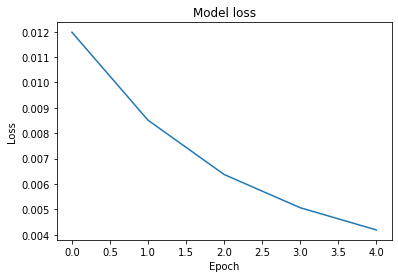



** Evaluating model (in silent mode) **
loss: 0.07405954599380493
categorical accuracy: 0.9750999808311462


In [132]:
results_tpb, history_tpb = evaluate(model_tpb, epochs=5, batch_size=64, withValSplit=False)